The first part of the analysis is to find the main predictor for each country

In [3]:
from utils import *
import numpy as np
import statsmodels.api as sm

beers_ba, breweries_ba, users_ba, ratings_ba = load_data("ba")


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
7243442,The Abyss,34420,Deschutes Brewery,63,American Double / Imperial Stout,12.20,1411812000,jeremiahoden,jeremiahoden.671103,NaN,NaN,NaN,NaN,NaN,4.75,NaN,False
6424088,Great Lakes Lake Erie Monster,18421,Great Lakes Brewing Co.,73,American Double / Imperial IPA,9.10,1410861600,GuttaMane138,guttamane138.606688,NaN,NaN,NaN,NaN,NaN,4.00,NaN,False
6786657,Atwater Cherry Stout,47918,Atwater Brewery,15280,American Stout,6.50,1234522800,JoeyBeerBelly,joeybeerbelly.112042,4.00,4.00,4.00,4.00,4.00,4.00,12oz bottle served in a small snifterL - black...,True
6119431,Jai Alai IPA,46363,Cigar City Brewing,17981,American IPA,7.50,1403690400,cuvtcuv,cuvtcuv.636506,4.25,4.25,4.50,4.50,4.25,4.38,NaN,False
1270810,Terrapin Hopsecutioner,53886,Terrapin Beer Company,2372,American IPA,7.30,1377511200,kwkurdziel,kwkurdziel.335313,NaN,NaN,NaN,NaN,NaN,4.00,NaN,False
5638792,Waves Of Grain,118444,The LAB (Lexington Avenue Brewery),21876,American Amber / Red Ale,5.50,1397815200,pathman,pathman.600630,NaN,NaN,NaN,NaN,NaN,2.75,NaN,False
4797166,Alpha King,39,3 Floyds Brewing Co.,26,American Pale Ale (APA),6.66,1483527600,Timtac,timtac.419024,4.00,4.25,4.00,4.50,4.00,4.26,NaN,False
5995371,Chocolate Vanilla Porter,152931,Ravenous Brewing Co.,30383,American Porter,5.50,1420455600,Newport_beerguy,newport_beerguy.571998,4.00,3.25,3.75,3.75,3.75,3.65,Tried this at the brewery on 1/3/15 and decide...,True
2911371,Longshot American Stout,118359,Boston Beer Company (Samuel Adams),35,American Stout,7.20,1418468400,Lukebell15,lukebell15.697705,NaN,NaN,NaN,NaN,NaN,3.32,NaN,False
1499465,Lagunitas Imperial Red Ale,22387,Lagunitas Brewing Company,220,American Amber / Red Ale,7.80,1341396000,craigreno,craigreno.680389,NaN,NaN,NaN,NaN,NaN,4.00,NaN,False


In [6]:
users_ba.sample(10)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
123709,1,0,moyer_beer_lover.899911,Moyer_beer_lover,1.417172e+09,"United States, Pennsylvania"
1012,1036,142,timmy2b.118653,timmy2b,1.169636e+09,"United States, New York"
104447,2,0,rvthomas.908202,rvthomas,1.418555e+09,"United States, New York"
77514,1,0,slups.894445,slups,1.416222e+09,"United States, Texas"
49881,3,2,gilli24.333269,gilli24,1.243159e+09,"United States, Illinois"
15765,62,60,kack1533.1091685,KACK1533,1.452078e+09,"United States, Massachusetts"
62754,38,1,eotlbrewer.642655,EOTLBrewer,1.324206e+09,"United States, Illinois"
310,94,1,louislouis91.1075657,louislouis91,1.448968e+09,Ireland
89161,4,0,tbone_beerhorse.888158,TBone_BeerHorse,1.415185e+09,"United States, Washington"
94862,1,0,bikenick.6520,BikeNick,1.085652e+09,"United States, New Jersey"


In [5]:
columns_of_interest = ["appearance",  "aroma",  "palate",  "taste",  "overall"]
ratings_ba.dropna(subset=columns_of_interest + ["rating"], inplace=True)
X = ratings_ba[columns_of_interest]  # Predictors
y = ratings_ba["rating"]             # Target variable

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.728e+10
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:16:56   Log-Likelihood:             2.2519e+07
No. Observations:             4769675   AIC:                        -4.504e+07
Df Residuals:                 4769669   BIC:                        -4.504e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.489e-05   7.48e-06      7.334      0.0

C:\Users\Mathi\AppData\Local\Temp\ipykernel_11836\728805828.py:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


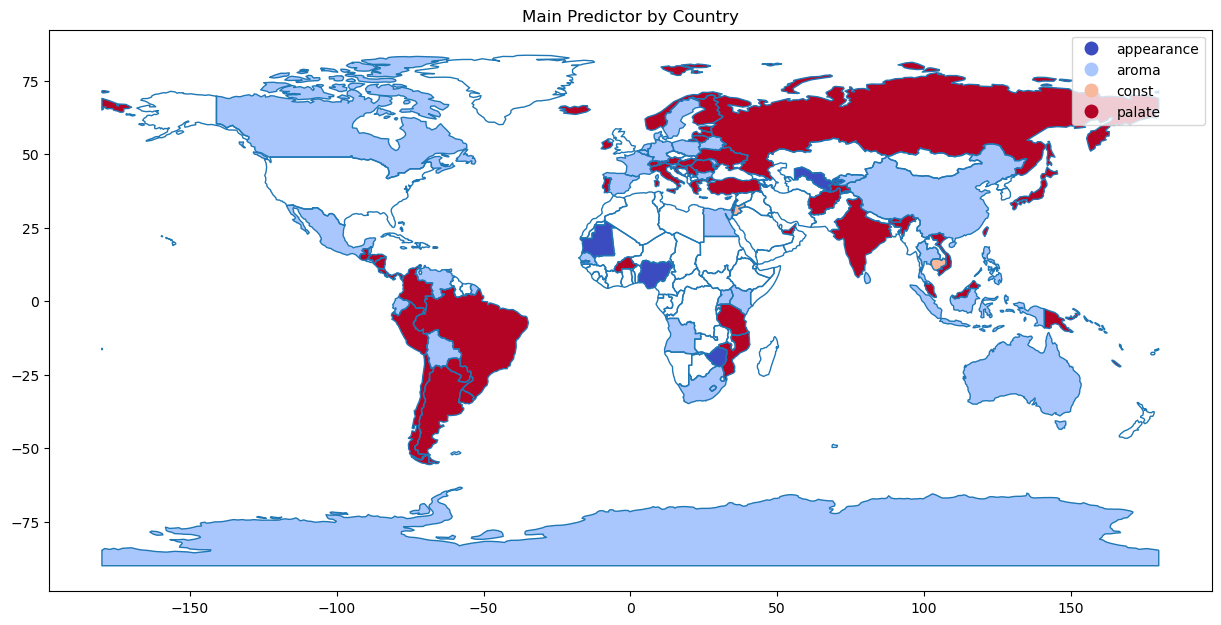

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Merge the datasets using the "user_id" column
merged_data = pd.merge(ratings_ba, users_ba[['user_id', 'location']], on='user_id', how='inner')

# Create an empty DataFrame to store regression results
results = pd.DataFrame(columns=['country', 'main_predictor'])

# Define the columns of interest (predictors)
columns_of_interest = ["appearance", "aroma", "palate", "taste", "overall"]

# Loop through each country and perform linear regression
for country in merged_data['location'].unique():
    country_data = merged_data[merged_data['location'] == country]
    X = sm.add_constant(country_data[columns_of_interest])
    if(len(X)==0):
        continue
    y = country_data['rating']
    model = sm.OLS(y, X).fit()
    main_predictor = model.params.idxmax()  # Get the main predictor with the highest coefficient
    results = pd.concat([results, pd.DataFrame({'country': [country], 'main_predictor': [main_predictor]})], ignore_index=True)



# Load a world shapefile for mapping (you may need to download a suitable shapefile)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world shapefile with the results DataFrame
world = world.merge(results, left_on='name', right_on='country', how='left')

# Plot the main predictor on a world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='main_predictor', cmap='coolwarm', ax=ax, legend=True)
plt.title('Main Predictor by Country')
plt.show()
